In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_excel("teknolojik_urunler_zamanli.xlsx")
df["Tarih"]=pd.to_datetime(df["Tarih"])
df.set_index("Tarih",inplace=True)

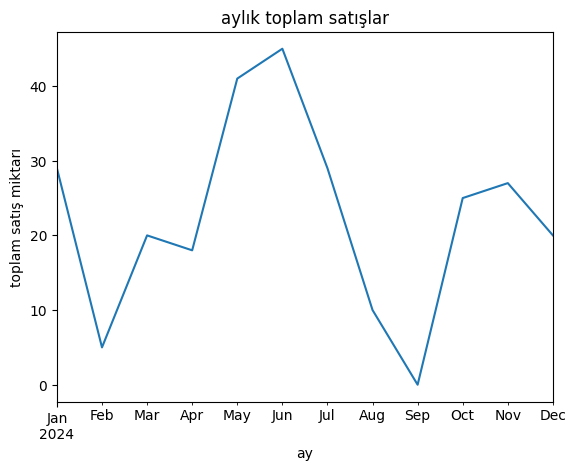

In [4]:
aylıksatıs=df.resample("ME")["Satış"].sum()
aylıksatıs.plot(kind="line",title="aylık toplam satışlar",xlabel="ay",ylabel="toplam satış miktarı")
plt.show()

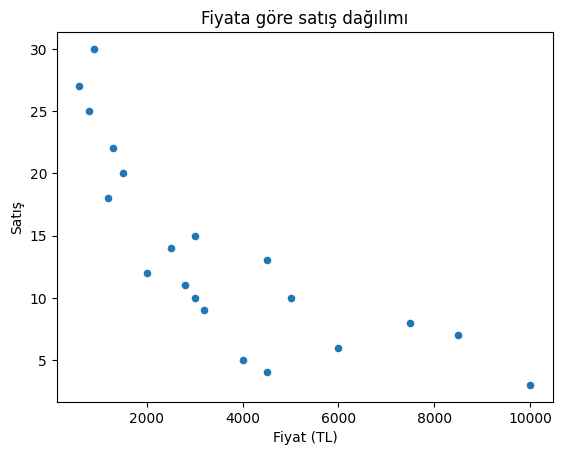

In [10]:
df.plot(kind="scatter", x="Fiyat (TL)", y="Satış", title="Fiyata göre satış dağılımı")
plt.show()


## TREND ANALİZİ 

np.polyfit(x, y, derece) → Veriye en uygun polinomu hesaplar.

x = df["Fiyat (TL)"] → bağımsız değişken.

y = df["Satış"] → bağımlı değişken.

1 → polinom derecesi = 1 → doğrusal (y = ax + b).



np.poly1d(z) → [a, b] değerini fonksiyona çevirir.

Artık p(x) yazarsan, sana o doğruyu hesaplar.

Mesela p(1000) → fiyat 1000 olursa satış tahmini.



X: fiyat değerleri

Y: o fiyat için tahmin edilen satış (p(x))

color="red" → çizgiyi kırmızı yapar.

👉 Bu sayede scatter noktalarının üzerine trend çizgisi oturur.




1. satır: Noktaları çiziyor.

2. satır: En uygun doğrunun eğimini ve sabitini buluyor (z).

3. satır: Bunu matematiksel fonksiyon haline getiriyor (p).

4. satır (eksik): Doğruyu çizdiriyor.

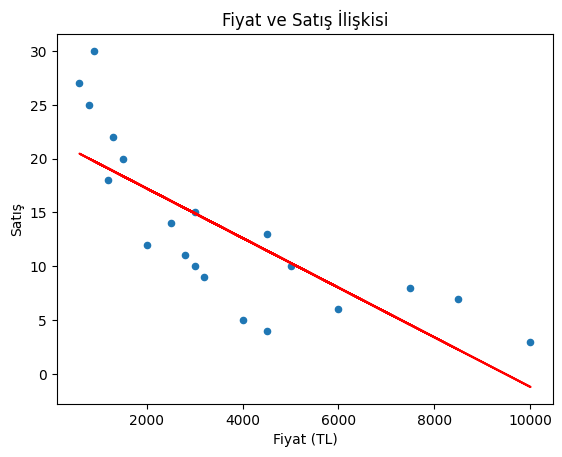

In [13]:
df.plot(kind="scatter", x="Fiyat (TL)", y="Satış", title="Fiyat ve Satış İlişkisi")
z = np.polyfit(df["Fiyat (TL)"], df["Satış"], 1)
p = np.poly1d(z)
plt.plot(df["Fiyat (TL)"], p(df["Fiyat (TL)"]), color="red")
plt.show()


C:\Users\bunco\AppData\Local\Temp\ipykernel_18756\1271900449.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Fiyat Kategorisi')['Satış'].sum().plot(


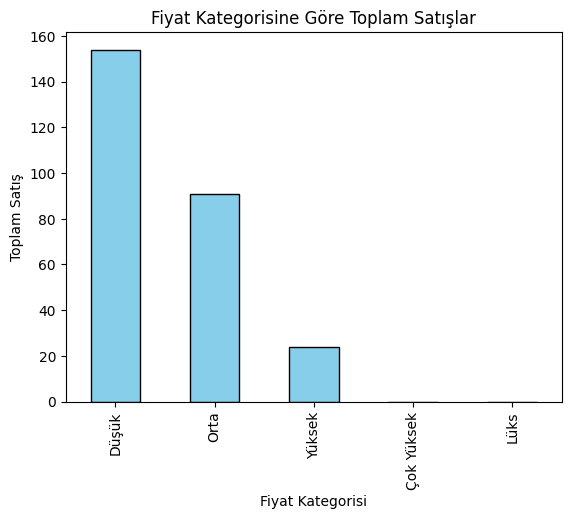

In [14]:
bins = [0, 2000, 5000, 10000, 20000, 30000]
labels = ['Düşük', 'Orta', 'Yüksek', 'Çok Yüksek', 'Lüks']


df['Fiyat Kategorisi'] = pd.cut(df['Fiyat (TL)'], bins=bins, labels=labels)


df.groupby('Fiyat Kategorisi')['Satış'].sum().plot(
    kind='bar',
    title='Fiyat Kategorisine Göre Toplam Satışlar',
    color='skyblue',
    edgecolor='black'
)


plt.xlabel('Fiyat Kategorisi')
plt.ylabel('Toplam Satış')
plt.show()


bins → fiyat aralıklarını tanımlıyor.
0–2000 → Düşük
2000–5000 → Orta
5000–10000 → Yüksek
10000–20000 → Çok Yüksek
20000–30000 → Lüks
labels → bu aralıkların isimleri. (grafikte gözükecek)
👉 Bu yapı aslında sayısal veriyi kategorik veriye dönüştürmek için kullanılır.


pd.cut() → “cut” = dilimlemek.
df['Fiyat (TL)'] → fiyat sütununu alıyor.
bins=bins → fiyatları yukarıda belirlenen aralıklara bölüyor.
labels=labels → her fiyatı, uygun etiketle işaretliyor.
📌 Sonuç: Fiyat Kategorisi adında yeni bir sütun oluşuyor, her ürün artık “Düşük / Orta / Yüksek...” gibi bir kategoriye sahip oluyor.




df.groupby('Fiyat Kategorisi') → ürünleri kategoriye göre gruplar.
['Satış'] → sadece satış sütununu alır.
.sum() → her kategorideki satışların toplamını hesaplar.
.plot(kind='bar') → sonuçları bar (çubuk) grafik olarak çizer.
title=... → grafiğin başlığı.
👉 Yani her fiyat kategorisinde toplam kaç adet ürün satıldığını görürsün.